<a href="https://colab.research.google.com/github/kwoods15/ursp688y_sp2024/blob/main/exercises/exercise06/exercise06_woods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise06/exercise06.ipynb)

# Exercise 6

## Problem

In class this week, we saw how to access real-time data about Capital Bikeshare from the internet using their API. We also dealt with the challenge of wrangling those data. We needed to parse a JSON file into a table, and we considered how we might retrieve, store, and combine many JSONs in order to understand how bike availability changed over time.

These real-time data can help us answer questions about how well Captial Bikeshare is being utilized.

See if you can use data from the API (I have already stored and combined it--see below) answer these questions:
- How many bikes were available within the system during each hour over a 24 hour period?
    - Can you graph this over time?
    - Which hour of the day were bikes most available? Least available?

**Bonus:** Can you write a function to estimate how many bikes are <ins>currently being used</ins>, whenever you call the function? This will require loading real-time data from the API and comparing it to stored data.

## Data

I wrote a script, which you can see [here](https://github.com/ncsg/ursp688y_sp2024/blob/main/demos/demo06/cabi_data/get_cabi_free_bikes.py), to retrieve and store JSON data from the `free_bike_status` table in [Capital Bikeshare's](https://capitalbikeshare.com/system-data) GBFS feed every 5 minutes. I ran this script on my computer for a bit more than 24 hours. ([Here's a tutorial](https://realpython.com/run-python-scripts/) on running scripts on the command line, if you're curious.) All of those JSONS are available for you to use. They're stored at [`ursp688y_sp2024/demos/demo06/cabi_data`](https://github.com/ncsg/ursp688y_sp2024/tree/main/demos/demo06/cabi_data).

## Building Off of the Demo

The in-class demo gave us a starting point for how to access real-time JSON data from the API, load saved JSON data, and parse JSON data into a DataFrame.

I have copied what we did in class below and added onto it to develop a single tidy dataframe with records from all the saved JSONs, plus timestamps. This should be all the data you need for the questions above (except the bonus).

See if you can follow my code, then build onto it.

As usual, please wrap the code for your solution in a function, and put that function into a module (you can add to my module, or make a new one if you prefer). Then load your main function from the module and call it in the notebook to demonstrate your solution.


# Setup

In [ ]:
# Import packages
import os
import json
import requests
import pandas as pd

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set the working directory
# You will need to change this to your own folder on Google Drive
os.chdir('/content/drive/MyDrive/Colab Notebooks//woods_06/')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import module
import exercise06_woods

ModuleNotFoundError: No module named 'exercise06_woods'

# Request current data from the API

In [ ]:
# Making a get request
response = requests.get('https://gbfs.lyft.com/gbfs/1.1/dca-cabi/en/free_bike_status.json')

# Get JSON content
data = response.json()

# Inspect the contents
data.keys()

dict_keys(['data', 'last_updated', 'ttl', 'version'])

In [ ]:
# Make a dataframe out of data for available bikes
df = pd.DataFrame(data['data']['bikes'])

df.head()

,bike_id,name,rental_uris,fusion_lon,type,lat,fusion_lat,lon,is_reserved,is_disabled
0,a9dadd36e0f72e8231fa2a6e55b6a7a4,320-065,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0.0,electric_bike,38.950901,0.0,-76.963147,0,0
1,410fc3fc8392966e1d3653038a8bef61,688-605,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0.0,electric_bike,38.935038,0.0,-77.040999,0,0
2,e8833cab7b61697197d38e13d472c547,100-790,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0.0,electric_bike,38.879075,0.0,-76.963549,0,0
3,66f4ec090420130939c685cb077e9456,251-373,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0.0,electric_bike,38.996222,0.0,-77.076080,0,0
4,63ec82e09da17b3e9555e1a113b84fdf,723-811,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0.0,electric_bike,38.861937,0.0,-77.093328,0,0


# Load JSON data saved in a file

In [ ]:
# open a single stored json
with open('cabi_data/cabi_bike_status_2024-03-03_13-11-54.json') as json_data: # Notice how I added 'cabi_data/' to the front of the path to get into that subdirectory where the jsons are stored?
    data = json.load(json_data)
    json_data.close()

In [ ]:
# see how the data are stored
type(data)

dict

In [ ]:
# see what keys are available
data.keys()

dict_keys(['data', 'last_updated', 'ttl', 'version'])

In [ ]:
# drill into the records for each bike
records = data['data']['bikes']

# convert to a dataframe
df = pd.DataFrame(records)

# drop a column that we won't use, just to keep things clean
df = df.drop(columns=['rental_uris'])

In [ ]:
df.head()

,is_reserved,fusion_lon,fusion_lat,lat,type,is_disabled,bike_id,name,lon
0,0,0.0,0.0,38.887458,electric_bike,0,d94788433d337e4186fb431076b52e91,320-065,-77.025747
1,0,0.0,0.0,38.905328,electric_bike,0,cc49246f85fdc23a6a13b3402ab52b37,222-581,-77.058526
2,0,0.0,0.0,38.908954,electric_bike,0,75c5df17a8236707a7948f509a5ab929,228-812,-77.043055
3,0,0.0,0.0,38.955421,electric_bike,0,4e51a79c1e03962064762ff16013b1a8,570-760,-76.940135
4,0,0.0,0.0,38.892292,electric_bike,0,5983a1b66f086f7905d8aa701fa7b5df,268-224,-77.042912


# Iteratively load all the JSON files and combine them into a single dataframe

Except for the impact statements above, this is probably the only part of the code you'll need to keep. This function wraps all the loading steps. Feel free to delete the cells above if you're not using them.

In [ ]:
def load_and_combine_free_bike_status_jsons_as_df(json_dir):
    """Loads multiple GBFS free_bike_status jsons into a single DataFrame with timestamps

    json_dir: path to folder where jsons are stored
    """
    # Initiate a list to store all my dataframes in
    dfs = []
    # Loop through files in the cabi_data directory (notice this is a path relative to my current working directory?)
    for file in os.listdir(json_dir):
        # Only move forward if the last five characters of the file name are .json
        if file[-5:] == '.json':
            # Load the json file
            file_path = os.path.join(json_dir, file) # This function intelligently combines parts of paths into a single string
            with open(file_path) as json_data:
                data = json.load(json_data)
                json_data.close()
            # Make bike records into a dataframe
            bikes_df = pd.DataFrame(data['data']['bikes'])
            # Get timestamp
            timestamp = data['last_updated']
            # Save timestamp as a column in the dataframe
            bikes_df['timestamp'] = timestamp
            # Store dataframe
            dfs.append(bikes_df)
    # Concatenate all the dataframes together into a single dataframe
    df = pd.concat(dfs)
    # Convert POSIX timestamp in UTC to datetime object
    # For reference: https://stackoverflow.com/questions/65948018/how-to-convert-unix-epoch-time-to-datetime-with-timezone-in-pandas
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
    # Then convert to US Eastern time
    df['timestamp'] = df['timestamp'].dt.tz_convert('US/Eastern')
    # Delete a column we don't need
    df = df.drop(columns=['rental_uris'])
    return df




df = load_and_combine_free_bike_status_jsons_as_df('cabi_data')

df



,is_reserved,fusion_lon,fusion_lat,lat,type,is_disabled,bike_id,name,lon,timestamp
0,0,0.0,0.0,38.887411,electric_bike,0,b5e8bae2e5c91535f45eda755a2e09d9,320-065,-77.025736,2024-03-03 21:17:20-05:00
1,0,0.0,0.0,38.905284,electric_bike,0,30f87b0a4cc744d29571cb392de34b3d,222-581,-77.058509,2024-03-03 21:17:20-05:00
2,0,0.0,0.0,38.955417,electric_bike,0,e07c3134d1c3e92bb7a1de2ea2907a37,570-760,-76.940121,2024-03-03 21:17:20-05:00
3,0,0.0,0.0,38.881441,electric_bike,0,518729bda7343340ba9c91761d74ea9d,268-224,-77.027428,2024-03-03 21:17:20-05:00
4,0,0.0,0.0,38.907838,electric_bike,0,e464b5793c0b3258a88f9ba15f0f7f00,137-726,-77.071633,2024-03-03 21:17:20-05:00
...,...,...,...,...,...,...,...,...,...,...
874,0,0.0,0.0,38.925968,electric_bike,0,40b11ed3489aaf1a0c217e8d22ee5e86,224-5066,-76.981156,2024-03-04 16:42:43-05:00
875,0,0.0,0.0,38.907311,electric_bike,0,6833ae7aad3834dee1cb23484a407d67,377-6747,-77.022558,2024-03-04 16:42:43-05:00
876,0,0.0,0.0,38.996064,electric_bike,0,056c6beac05a748b1e1a0cc49b7e2142,420-8187,-77.078067,2024-03-04 16:42:43-05:00
877,0,0.0,0.0,38.894981,electric_bike,0,95748a3e8342e09238e493138be79afd,860-3490,-77.023244,2024-03-04 16:42:43-05:00


from matplotlib import pyplot as plt
df['is_reserved'].plot(kind='hist', bins=20, title='is_reserved')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['lat'].plot(kind='hist', bins=20, title='lat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['lon'].plot(kind='hist', bins=20, title='lon')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='is_reserved', y='lat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='lat', y='lon', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['is_reserved']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('is_reserved')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['lat']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('lat')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['lon']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('lon')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['is_reserved'].plot(kind='line', figsize=(8, 4), title='is_reserved')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['lat'].plot(kind='line', figsize=(8, 4), title='lat')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['lon'].plot(kind='line', figsize=(8, 4), title='lon')
plt.gca().spines[['top', 'right']].set_visible(False)

This is where you take over. Can you use this dataframe to answer the question(s) above?

In [ ]:
#How many bikes were available within the system during each hour over a 24 hour period?
#     Can you graph this over time?
#     Which hour of the day were bikes most available? Least available?

In [ ]:
# problems with data
# use name #s instead of bike id to get a more accurate number

In [63]:
#df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort DataFrame by 'Time'
#df_sorted = df.sort_values(by='timestamp')

# Initialize an empty dictionary to hold sorted subsets
sorted_dict = {}

# Iterate through the sorted DataFrame
for time, group in df.groupby(pd.Grouper(key='timestamp', freq='H')):
    # Convert time to string for dictionary key
    time_str = str(time)
    # Create dictionary entry for each time category
    sorted_dict[time_str] = group.to_dict(orient='records')

# Print the sorted dictionaries
sorted_dict['2024-03-03 15:00:00-05:00']



{'is_reserved': 0,
 'fusion_lon': 0.0,
 'fusion_lat': 0.0,
 'lat': 38.887457833333336,
 'type': 'electric_bike',
 'is_disabled': 0,
 'bike_id': 'd94788433d337e4186fb431076b52e91',
 'name': '320-065',
 'lon': -77.02574666666666,
 'timestamp': Timestamp('2024-03-03 15:11:08-0500', tz='US/Eastern')}

In [68]:
count_by_key = {}

for time in sorted_dict.keys():

    length = len(sorted_dict[time])
    count_by_key[time] = length

count_by_key

{'2024-03-03 15:00:00-05:00': 8384,
 '2024-03-03 16:00:00-05:00': 10249,
 '2024-03-03 17:00:00-05:00': 10339,
 '2024-03-03 18:00:00-05:00': 10298,
 '2024-03-03 19:00:00-05:00': 10427,
 '2024-03-03 20:00:00-05:00': 10483,
 '2024-03-03 21:00:00-05:00': 10640,
 '2024-03-03 22:00:00-05:00': 10859,
 '2024-03-03 23:00:00-05:00': 11000,
 '2024-03-04 00:00:00-05:00': 11134,
 '2024-03-04 01:00:00-05:00': 11147,
 '2024-03-04 02:00:00-05:00': 11182,
 '2024-03-04 03:00:00-05:00': 11236,
 '2024-03-04 04:00:00-05:00': 11216,
 '2024-03-04 05:00:00-05:00': 11050,
 '2024-03-04 06:00:00-05:00': 10716,
 '2024-03-04 07:00:00-05:00': 10552,
 '2024-03-04 08:00:00-05:00': 10231,
 '2024-03-04 09:00:00-05:00': 10508,
 '2024-03-04 10:00:00-05:00': 10719,
 '2024-03-04 11:00:00-05:00': 10587,
 '2024-03-04 12:00:00-05:00': 10552,
 '2024-03-04 13:00:00-05:00': 10720,
 '2024-03-04 14:00:00-05:00': 10712,
 '2024-03-04 15:00:00-05:00': 9737,
 '2024-03-04 16:00:00-05:00': 10485,
 '2024-03-04 17:00:00-05:00': 10381}

In [80]:
import matplotlib.pyplot as plt

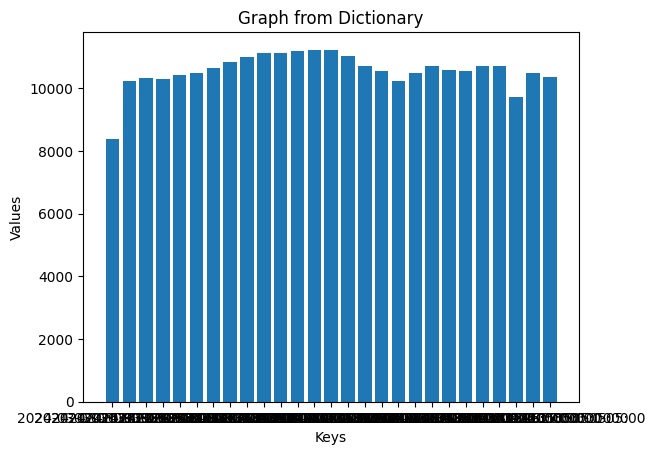

In [85]:
keys = list(count_by_key.keys())
values = list(count_by_key.values())

plt.bar(keys, values)
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Graph from Dictionary')
plt.show()

In [ ]:
# HOUR 1 HAS LEAST!
# HOUR 13 HAS MOST!

In [75]:
#ax = count_by_key.plot.bar()
#plt.show()

In [81]:
###fig = plt.figure()
# Define an axis within the figure (coordinate space)
#ax = fig.add_subplot(111) # an axis on a 1x1 grid in first position
# Draw a bar chart within the axis
#ax.bar(count_by_key, length)